Chapter 2

In [276]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sms
import os
import tarfile
import urllib

In [277]:
DOWNLOAD_ROOT = "https://raw.githubusercontent.com/ageron/handson-ml2/master/"
HOUSING_PATH = os.path.join("datasets", "housing")
HOUSING_URL = DOWNLOAD_ROOT + "datasets/housing/housing.tgz"

In [278]:
def fetch_housing_data(housing_url = HOUSING_URL, housing_path = HOUSING_PATH):
    os.makedirs(housing_path, exist_ok = True)
    tgz_path = os.path.join(housing_path, "housing.tgz")
    urllib.request.urlretrieve(housing_url, tgz_path)
    housing_tgz = tarfile.open(tgz_path)
    housing_tgz.extractall(path = housing_path)
    housing_tgz.close()

In [279]:
fetch_housing_data()

In [280]:
def load_housing_data(housing_path = HOUSING_PATH):
    csv_path = os.path.join(housing_path, "housing.csv")
    return pd.read_csv(csv_path)

In [281]:
housing = load_housing_data()
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [282]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


<AxesSubplot:>

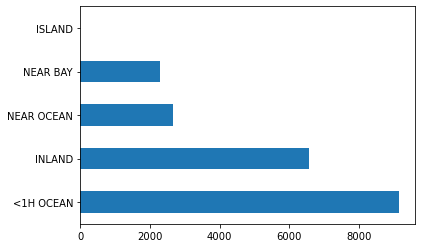

In [283]:
housing["ocean_proximity"].value_counts().plot(kind="barh")

In [284]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


<AxesSubplot:>

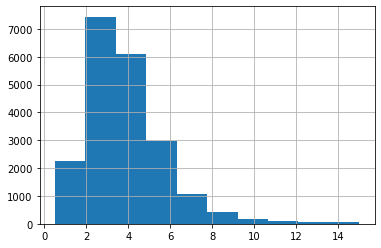

In [285]:
housing["median_income"].hist()

In [286]:
housing["income_cat"] = pd.cut(housing["median_income"],
                            bins =[0., 1.5, 3.0, 4.5, 6., np.inf],
                            labels = [1,2,3,4,5])
housing["income_cat"].value_counts()

3    7236
2    6581
4    3639
5    2362
1     822
Name: income_cat, dtype: int64

<AxesSubplot:>

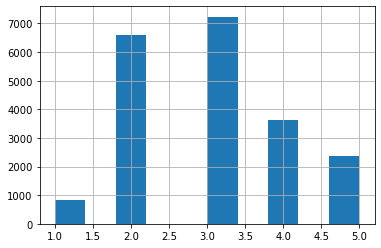

In [287]:
housing["income_cat"].hist()

In [288]:
y = housing["median_house_value"]
X = housing.drop("median_house_value", axis=1)
X

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,income_cat
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,NEAR BAY,5
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,NEAR BAY,5
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,NEAR BAY,5
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,NEAR BAY,4
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,NEAR BAY,3
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,INLAND,2
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,INLAND,2
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,INLAND,2
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,INLAND,2


In [289]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)
X_train

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,income_cat
5829,-118.30,34.19,52.0,2962.0,468.0,1364.0,466.0,4.9042,<1H OCEAN,4
16314,-121.32,38.01,20.0,1903.0,395.0,919.0,359.0,2.6765,INLAND,2
14734,-117.02,32.81,14.0,3173.0,599.0,1451.0,585.0,3.7292,<1H OCEAN,3
20166,-119.29,34.44,34.0,4314.0,878.0,2361.0,831.0,3.2279,NEAR OCEAN,3
10297,-117.88,33.92,13.0,3292.0,727.0,1565.0,698.0,5.4570,<1H OCEAN,4
...,...,...,...,...,...,...,...,...,...,...
19193,-122.69,38.44,40.0,1449.0,281.0,636.0,295.0,2.7222,<1H OCEAN,2
1097,-121.77,39.66,20.0,3759.0,NaN,1705.0,600.0,4.7120,INLAND,4
5183,-118.26,33.94,41.0,1510.0,410.0,1408.0,389.0,1.6500,<1H OCEAN,2
5153,-118.26,33.95,44.0,1513.0,369.0,1088.0,344.0,1.2969,<1H OCEAN,1


<AxesSubplot:>

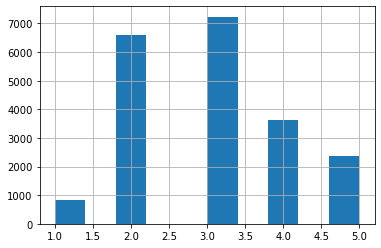

In [290]:
housing["income_cat"].hist()

<AxesSubplot:>

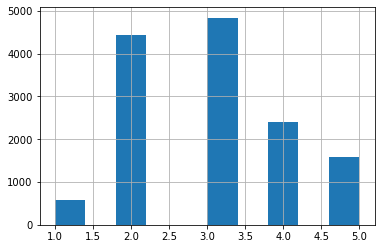

In [291]:
X_train["income_cat"].hist()

In [292]:
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(housing, housing["income_cat"]):
    strat_train_set = housing.loc[train_index]
    strat_test_set = housing.loc[test_index]



In [293]:
strat_test_set["income_cat"].value_counts() / len(strat_test_set)

3    0.350533
2    0.318798
4    0.176357
5    0.114341
1    0.039971
Name: income_cat, dtype: float64

In [294]:
housing["income_cat"].value_counts() / len(housing)

3    0.350581
2    0.318847
4    0.176308
5    0.114438
1    0.039826
Name: income_cat, dtype: float64

In [295]:
def income_cat_proportions(data):
    return data["income_cat"].value_counts() / len(data)

train_set, test_set = train_test_split(housing, test_size=0.2, random_state=42)

compare_props = pd.DataFrame({
    "Overall": income_cat_proportions(housing),
    "Stratified": income_cat_proportions(strat_test_set),
    "Random": income_cat_proportions(test_set),
}).sort_index()
compare_props["Rand. %error"] = 100 * compare_props["Random"] / compare_props["Overall"] - 100
compare_props["Strat. %error"] = 100 * compare_props["Stratified"] / compare_props["Overall"] - 100

compare_props



,Overall,Stratified,Random,Rand. %error,Strat. %error
1,0.039826,0.039971,0.040213,0.973236,0.364964
2,0.318847,0.318798,0.324370,1.732260,-0.015195
3,0.350581,0.350533,0.358527,2.266446,-0.013820
4,0.176308,0.176357,0.167393,-5.056334,0.027480
5,0.114438,0.114341,0.109496,-4.318374,-0.084674


In [296]:
housing_copy = strat_train_set.copy()

array([[<AxesSubplot:title={'center':'longitude'}>,
        <AxesSubplot:title={'center':'latitude'}>,
        <AxesSubplot:title={'center':'housing_median_age'}>],
       [<AxesSubplot:title={'center':'total_rooms'}>,
        <AxesSubplot:title={'center':'total_bedrooms'}>,
        <AxesSubplot:title={'center':'population'}>],
       [<AxesSubplot:title={'center':'households'}>,
        <AxesSubplot:title={'center':'median_income'}>,
        <AxesSubplot:title={'center':'median_house_value'}>]],
      dtype=object)

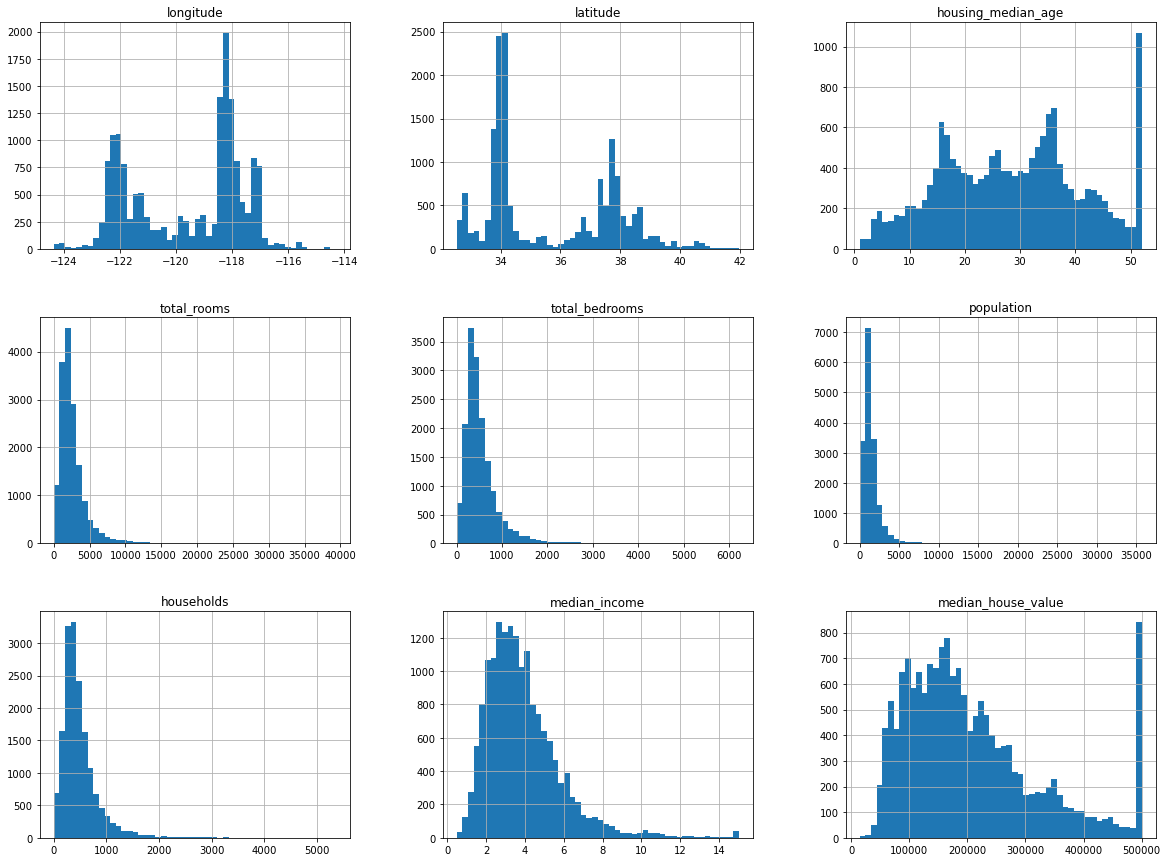

In [297]:
housing_copy.hist(bins = 50, figsize=(20,15))

<AxesSubplot:>

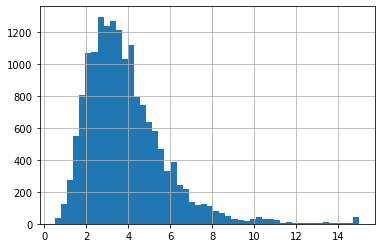

In [298]:
housing_copy["median_income"].hist(bins=50)

<AxesSubplot:xlabel='longitude', ylabel='latitude'>

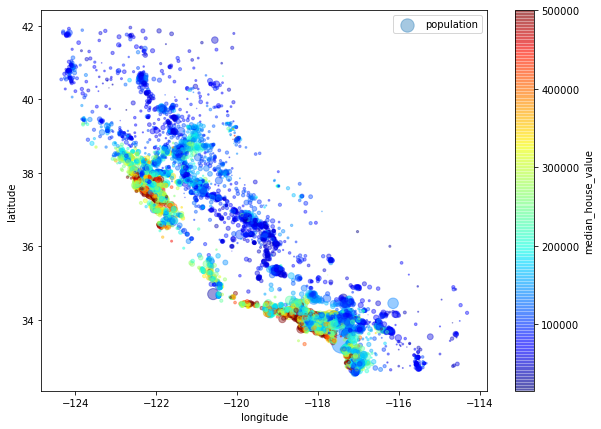

In [299]:
housing_copy.plot(kind="scatter", x="longitude", y="latitude", alpha = 0.4,
                    s= housing_copy["population"]/ 100, label ="population", figsize=(10,7),
                    c="median_house_value", cmap = plt.get_cmap("jet"), colorbar = True,
                    sharex = False)

<AxesSubplot:>

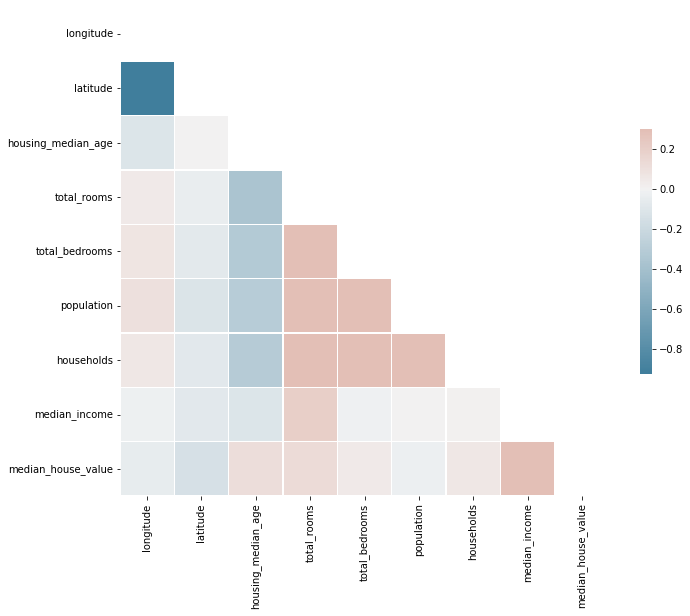

In [300]:
corr = housing_copy.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))

f, ax = plt.subplots(figsize= (11,9))
cmap = sms.diverging_palette(230, 20, as_cmap=True)
sms.heatmap(corr, mask=mask, cmap = cmap, vmax = .3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [301]:
housing_copy = strat_test_set.drop("median_house_value", axis=1)
housing_labels = strat_train_set["median_house_value"].copy()

In [302]:
sample_incomplete_rows = housing_copy[housing_copy.isnull().any(axis=1)].head()
sample_incomplete_rows

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,income_cat
11441,-117.98,33.73,18.0,3833.0,NaN,2192.0,996.0,3.4679,<1H OCEAN,3
19890,-119.15,36.29,18.0,1435.0,NaN,657.0,254.0,2.4281,INLAND,2
3912,-118.55,34.19,18.0,5862.0,NaN,3161.0,1280.0,3.1106,<1H OCEAN,3
8530,-118.35,33.90,31.0,1547.0,NaN,956.0,287.0,3.4698,<1H OCEAN,3
11311,-117.96,33.78,33.0,1520.0,NaN,658.0,242.0,4.8750,<1H OCEAN,4


In [303]:
sample_incomplete_rows.drop("total_bedrooms", axis=1)

,longitude,latitude,housing_median_age,total_rooms,population,households,median_income,ocean_proximity,income_cat
11441,-117.98,33.73,18.0,3833.0,2192.0,996.0,3.4679,<1H OCEAN,3
19890,-119.15,36.29,18.0,1435.0,657.0,254.0,2.4281,INLAND,2
3912,-118.55,34.19,18.0,5862.0,3161.0,1280.0,3.1106,<1H OCEAN,3
8530,-118.35,33.90,31.0,1547.0,956.0,287.0,3.4698,<1H OCEAN,3
11311,-117.96,33.78,33.0,1520.0,658.0,242.0,4.8750,<1H OCEAN,4


In [304]:
median = housing_copy["total_bedrooms"].median()
sample_incomplete_rows["total_bedrooms"].fillna(median, inplace=True)
sample_incomplete_rows

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,income_cat
11441,-117.98,33.73,18.0,3833.0,442.0,2192.0,996.0,3.4679,<1H OCEAN,3
19890,-119.15,36.29,18.0,1435.0,442.0,657.0,254.0,2.4281,INLAND,2
3912,-118.55,34.19,18.0,5862.0,442.0,3161.0,1280.0,3.1106,<1H OCEAN,3
8530,-118.35,33.90,31.0,1547.0,442.0,956.0,287.0,3.4698,<1H OCEAN,3
11311,-117.96,33.78,33.0,1520.0,442.0,658.0,242.0,4.8750,<1H OCEAN,4


In [305]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy="median")

In [306]:
housing_num = housing_copy.select_dtypes(include=[np.number])
housing_num

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
5241,-118.39,34.12,29.0,6447.0,1012.0,2184.0,960.0,8.2816
17352,-120.42,34.89,24.0,2020.0,307.0,855.0,283.0,5.0099
3505,-118.45,34.25,36.0,1453.0,270.0,808.0,275.0,4.3839
7777,-118.10,33.91,35.0,1653.0,325.0,1072.0,301.0,3.2708
14155,-117.07,32.77,38.0,3779.0,614.0,1495.0,614.0,4.3529
...,...,...,...,...,...,...,...,...
12182,-117.29,33.72,19.0,2248.0,427.0,1207.0,368.0,2.8170
7275,-118.24,33.99,33.0,885.0,294.0,1270.0,282.0,2.1615
17223,-119.72,34.44,43.0,1781.0,342.0,663.0,358.0,4.7000
10786,-117.91,33.63,30.0,2071.0,412.0,1081.0,412.0,4.9125


In [307]:
imputer.fit(housing_num)

SimpleImputer(strategy='median')

In [308]:
X = imputer.transform(housing_num)
housing_tr = pd.DataFrame(X, columns = housing_num.columns, index = housing_num.index)
housing_tr

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
5241,-118.39,34.12,29.0,6447.0,1012.0,2184.0,960.0,8.2816
17352,-120.42,34.89,24.0,2020.0,307.0,855.0,283.0,5.0099
3505,-118.45,34.25,36.0,1453.0,270.0,808.0,275.0,4.3839
7777,-118.10,33.91,35.0,1653.0,325.0,1072.0,301.0,3.2708
14155,-117.07,32.77,38.0,3779.0,614.0,1495.0,614.0,4.3529
...,...,...,...,...,...,...,...,...
12182,-117.29,33.72,19.0,2248.0,427.0,1207.0,368.0,2.8170
7275,-118.24,33.99,33.0,885.0,294.0,1270.0,282.0,2.1615
17223,-119.72,34.44,43.0,1781.0,342.0,663.0,358.0,4.7000
10786,-117.91,33.63,30.0,2071.0,412.0,1081.0,412.0,4.9125


In [309]:
housing_cat = housing_copy[["ocean_proximity"]]
housing_cat.head(10)

,ocean_proximity
5241,<1H OCEAN
17352,<1H OCEAN
3505,<1H OCEAN
7777,<1H OCEAN
14155,NEAR OCEAN
7057,<1H OCEAN
33,NEAR BAY
17049,NEAR OCEAN
18164,<1H OCEAN
10444,NEAR OCEAN


In [310]:
from sklearn.preprocessing import OrdinalEncoder

ordinal_encoder = OrdinalEncoder()
housing_cat_encoded = ordinal_encoder.fit_transform(housing_cat)
housing_cat_encoded[:10]

array([[0.],
       [0.],
       [0.],
       [0.],
       [4.],
       [0.],
       [3.],
       [4.],
       [0.],
       [4.]])

In [311]:
from sklearn.preprocessing import OneHotEncoder

cat_encoder = OneHotEncoder(sparse=False)
housing_cat_1hot = cat_encoder.fit_transform(housing_cat)
housing_cat_1hot

array([[1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       ...,
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.]])

In [312]:
def feature_engineering(data):
    data["bedrooms_per_household"] = data["total_bedrooms"] / data["households"]
    data["population_per_household"] = data["population"] / data["households"]
    data["rooms_per_household"] = data["total_rooms"] / data["households"]
    return data

In [313]:
housing_feature_engineered = feature_engineering(housing_num)
housing_feature_engineered

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,bedrooms_per_household,population_per_household,rooms_per_household
5241,-118.39,34.12,29.0,6447.0,1012.0,2184.0,960.0,8.2816,1.054167,2.275000,6.715625
17352,-120.42,34.89,24.0,2020.0,307.0,855.0,283.0,5.0099,1.084806,3.021201,7.137809
3505,-118.45,34.25,36.0,1453.0,270.0,808.0,275.0,4.3839,0.981818,2.938182,5.283636
7777,-118.10,33.91,35.0,1653.0,325.0,1072.0,301.0,3.2708,1.079734,3.561462,5.491694
14155,-117.07,32.77,38.0,3779.0,614.0,1495.0,614.0,4.3529,1.000000,2.434853,6.154723
...,...,...,...,...,...,...,...,...,...,...,...
12182,-117.29,33.72,19.0,2248.0,427.0,1207.0,368.0,2.8170,1.160326,3.279891,6.108696
7275,-118.24,33.99,33.0,885.0,294.0,1270.0,282.0,2.1615,1.042553,4.503546,3.138298
17223,-119.72,34.44,43.0,1781.0,342.0,663.0,358.0,4.7000,0.955307,1.851955,4.974860
10786,-117.91,33.63,30.0,2071.0,412.0,1081.0,412.0,4.9125,1.000000,2.623786,5.026699


In [314]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
housing_scaled = scaler.fit_transform(housing_feature_engineered)
housing_scaled

array([[ 0.57507019, -0.69657252,  0.0329564 , ..., -0.11568062,
        -0.43699104,  0.73101229],
       [-0.43480141, -0.33466769, -0.36298077, ..., -0.01634584,
         0.03395612,  0.96266687],
       [ 0.54522177, -0.63547171,  0.58726843, ..., -0.35024192,
        -0.01843971, -0.05472704],
       ...,
       [-0.08656982, -0.54617051,  1.14158047, ..., -0.43619308,
        -0.70398558, -0.22415399],
       [ 0.81385757, -0.92687559,  0.11214383, ..., -0.29129458,
        -0.21686285, -0.19570984],
       [ 0.49049967, -0.66367208,  0.58726843, ..., -0.17713599,
        -0.02683317,  0.39501903]])

In [315]:
housing_concat = np.hstack([housing_scaled, housing_cat_1hot])
housing_concat

array([[ 0.57507019, -0.69657252,  0.0329564 , ...,  0.        ,
         0.        ,  0.        ],
       [-0.43480141, -0.33466769, -0.36298077, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.54522177, -0.63547171,  0.58726843, ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [-0.08656982, -0.54617051,  1.14158047, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.81385757, -0.92687559,  0.11214383, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.49049967, -0.66367208,  0.58726843, ...,  0.        ,
         0.        ,  0.        ]])

In [316]:
housing = strat_train_set.drop("median_house_value",axis=1)
housing_labels = strat_train_set["median_house_value"].copy()

def data_transformations(data):
    ### Seperate labels if they exist
    if "median_house_value" in data.columns:
        labels = data["median_house_value"]
        data = data.drop("median_house_value", axis=1)
    else:
        labels = None

    ### Feature engineering
    feature_engineered_data = feature_engineering(data)
    features = list(feature_engineered_data.columns) #Creating a list of our features for future use

    ### Imputing data
    from sklearn.impute import SimpleImputer
    imputer = SimpleImputer(strategy = "median")

    housing_num = feature_engineered_data.select_dtypes(include=[np.number])
    imputed = imputer.fit_transform(housing_num)

    ### Encoding categorical data
    housing_cat = feature_engineered_data.select_dtypes(exclude=[np.number])

    from sklearn.preprocessing import OneHotEncoder
    cat_encoder = OneHotEncoder(sparse = False)
    housing_cat_1hot = cat_encoder.fit_transform(housing_cat)
    features = features + cat_encoder.categories_[0].tolist()
    features.remove("ocean_proximity") #We're encoding this variable so we don't need it in our list anymore

    ###Scaling numerical data
    from sklearn.preprocessing import StandardScaler
    scaler = StandardScaler()

    housing_scaled = scaler.fit_transform(imputed)

    ### Concatanating all data
    output = np.hstack([housing_scaled, housing_cat_1hot])

    return output, labels, features


In [317]:
train_data, train_labels, features = data_transformations(strat_train_set)
train_data

array([[-0.94135046,  1.34743822,  0.02756357, ...,  0.        ,
         0.        ,  0.        ],
       [ 1.17178212, -1.19243966, -1.72201763, ...,  0.        ,
         0.        ,  1.        ],
       [ 0.26758118, -0.1259716 ,  1.22045984, ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [-1.5707942 ,  1.31001828,  1.53856552, ...,  1.        ,
         0.        ,  0.        ],
       [-1.56080303,  1.2492109 , -1.1653327 , ...,  1.        ,
         0.        ,  0.        ],
       [-1.28105026,  2.02567448, -0.13148926, ...,  1.        ,
         0.        ,  0.        ]])

In [318]:
features

['longitude',
 'latitude',
 'housing_median_age',
 'total_rooms',
 'total_bedrooms',
 'population',
 'households',
 'median_income',
 'income_cat',
 'bedrooms_per_household',
 'population_per_household',
 'rooms_per_household',
 '<1H OCEAN',
 'INLAND',
 'ISLAND',
 'NEAR BAY',
 'NEAR OCEAN']

In [319]:
test_data, test_labels, features = data_transformations(strat_test_set)
test_data

array([[ 0.57507019, -0.69657252,  0.0329564 , ...,  0.        ,
         0.        ,  1.        ],
       [-0.43480141, -0.33466769, -0.36298077, ...,  0.        ,
         1.        ,  0.        ],
       [ 0.54522177, -0.63547171,  0.58726843, ...,  1.        ,
         0.        ,  0.        ],
       ...,
       [-0.08656982, -0.54617051,  1.14158047, ...,  0.        ,
         1.        ,  0.        ],
       [ 0.81385757, -0.92687559,  0.11214383, ...,  0.        ,
         1.        ,  0.        ],
       [ 0.49049967, -0.66367208,  0.58726843, ...,  1.        ,
         0.        ,  0.        ]])

In [320]:
### Linear Regression
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()

lin_reg.fit(train_data, train_labels)


LinearRegression()

In [321]:
original_values = test_labels[:5]
predicted_values = lin_reg.predict(test_data[:5])

comparison_df = pd.DataFrame(data={"Original Values": original_values, "Predicted Values": predicted_values})

comparison_df["Differences"] = comparison_df["Original Values"] - comparison_df["Predicted Values"]
comparison_df

,Original Values,Predicted Values,Differences
5241,500001.0,430593.091392,69407.908608
17352,162500.0,285374.202481,-122874.202481
3505,204600.0,232712.800350,-28112.800350
7777,159700.0,194717.728868,-35017.728868
14155,184000.0,248240.731000,-64240.731000


In [322]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

lin_mse = mean_squared_error(original_values, predicted_values)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

lin_mae = mean_absolute_error(original_values, predicted_values)
lin_mae

63930.67426131739

In [323]:
### Decision Tree Regressor
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor(random_state= 42)
tree_reg.fit(train_data, train_labels)

DecisionTreeRegressor(random_state=42)

In [324]:
train_predictions = tree_reg.predict(train_data)
tree_mse = mean_squared_error(train_labels, train_predictions)
tree_rmse = np.sqrt(tree_mse)
tree_rmse

0.0

In [325]:
### Cross Validation
from sklearn.model_selection import cross_val_score
scores = cross_val_score(tree_reg, train_data, train_labels, scoring="neg_mean_squared_error", cv=10)
tree_rmse_scores = np.sqrt(-scores)

In [326]:
def display_scores(scores):
    print("Scores: ", scores)
    print("Mean: ", scores.mean())
    print("Standard deviation: ", scores.std())

display_scores(tree_rmse_scores)

Scores:  [70824.86460222 69265.43911105 70860.89128052 73143.6242732
 68189.79683417 74845.58694955 75712.26299821 70925.68914136
 69652.74404875 72834.24516312]
Mean:  71625.51444021543
Standard deviation:  2319.858754337931


In [327]:
### Random Forest Regressor
from sklearn.ensemble import RandomForestRegressor

forest_reg = RandomForestRegressor(n_estimators=100, random_state = 42)
forest_reg.fit(train_data, train_labels)

RandomForestRegressor(random_state=42)

In [328]:
train_predictions = forest_reg.predict(train_data)
forest_mse = mean_squared_error(train_labels, train_predictions)
forest_rmse = np.sqrt(forest_mse)
forest_rmse

18796.98816862067

In [329]:
forest_scores = cross_val_score(forest_reg, train_data, train_labels, scoring = "neg_mean_squared_error", cv=10)
forest_rmse_scores = np.sqrt(-forest_scores)
display_scores(forest_rmse_scores)

Scores:  [51625.50923449 49595.77026479 46903.21986648 52054.44580805
 48038.01373657 51150.37967136 53115.15634704 50223.15213256
 48384.96672942 54583.30969038]
Mean:  50567.3923481122
Standard deviation:  2279.0119694027167


In [330]:
scores = cross_val_score(lin_reg, train_data, train_labels, scoring="neg_mean_squared_error", cv=10)
pd.Series(np.sqrt(-scores)).describe()

count       10.000000
mean     68414.805622
std       2279.550831
min      64628.721920
25%      66812.103554
50%      68717.588588
75%      69608.531770
max      71719.029644
dtype: float64

In [331]:
from sklearn.model_selection import GridSearchCV

param_grid = [
    {'n_estimators': [3,10,30], 'max_features': [2,4,6,8]},
    {'bootstrap': [False], 'n_estimators': [3,10], 'max_features': [2,3,4]},
]

forest_reg = RandomForestRegressor(random_state=42)
grid_search = GridSearchCV(forest_reg, param_grid, cv=5, scoring='neg_mean_squared_error', return_train_score=True)
grid_search.fit(train_data, train_labels)

GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42),
             param_grid=[{'max_features': [2, 4, 6, 8],
                          'n_estimators': [3, 10, 30]},
                         {'bootstrap': [False], 'max_features': [2, 3, 4],
                          'n_estimators': [3, 10]}],
             return_train_score=True, scoring='neg_mean_squared_error')

In [332]:
grid_search.best_params_

{'max_features': 8, 'n_estimators': 30}

In [333]:
grid_search.best_estimator_

RandomForestRegressor(max_features=8, n_estimators=30, random_state=42)

In [334]:
cvres = grid_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

64772.12310826017 {'max_features': 2, 'n_estimators': 3}
57072.09148438375 {'max_features': 2, 'n_estimators': 10}
54437.347665709625 {'max_features': 2, 'n_estimators': 30}
62065.79799705809 {'max_features': 4, 'n_estimators': 3}
54799.23918359469 {'max_features': 4, 'n_estimators': 10}
52251.42550351866 {'max_features': 4, 'n_estimators': 30}
61827.24216362284 {'max_features': 6, 'n_estimators': 3}
54454.39027503683 {'max_features': 6, 'n_estimators': 10}
51699.580397496175 {'max_features': 6, 'n_estimators': 30}
59714.39845322457 {'max_features': 8, 'n_estimators': 3}
52876.605451629955 {'max_features': 8, 'n_estimators': 10}
51253.27811015222 {'max_features': 8, 'n_estimators': 30}
63107.485726344115 {'bootstrap': False, 'max_features': 2, 'n_estimators': 3}
55910.52432366365 {'bootstrap': False, 'max_features': 2, 'n_estimators': 10}
62249.214957622506 {'bootstrap': False, 'max_features': 3, 'n_estimators': 3}
54801.69458055852 {'bootstrap': False, 'max_features': 3, 'n_estimators

In [335]:
pd.DataFrame(grid_search.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_features,param_n_estimators,param_bootstrap,params,split0_test_score,split1_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.050126,0.001838,0.002801,7.483161e-04,2,3,NaN,"{'max_features': 2, 'n_estimators': 3}",-4.068157e+09,-4.278945e+09,...,-4.195428e+09,1.570450e+08,18,-1.098594e+09,-1.124353e+09,-1.157133e+09,-1.112072e+09,-1.111546e+09,-1.120740e+09,1.993788e+07
1,0.147999,0.001414,0.007200,3.995670e-04,2,10,NaN,"{'max_features': 2, 'n_estimators': 10}",-3.184555e+09,-3.154756e+09,...,-3.257224e+09,9.818402e+07,11,-6.089889e+08,-6.080849e+08,-6.157070e+08,-6.119024e+08,-6.309264e+08,-6.151219e+08,8.338123e+06
2,0.450803,0.009331,0.021801,7.487876e-04,2,30,NaN,"{'max_features': 2, 'n_estimators': 30}",-2.936039e+09,-2.895381e+09,...,-2.963425e+09,7.080106e+07,6,-4.543360e+08,-4.649104e+08,-4.593777e+08,-4.515982e+08,-4.628155e+08,-4.586076e+08,5.008081e+06
3,0.072309,0.001928,0.002801,4.006631e-04,4,3,NaN,"{'max_features': 4, 'n_estimators': 3}",-3.881516e+09,-3.750860e+09,...,-3.852163e+09,7.300541e+07,15,-1.083642e+09,-1.082896e+09,-1.057100e+09,-1.040027e+09,-1.030068e+09,-1.058746e+09,2.181094e+07
4,0.233627,0.005918,0.007401,4.905446e-04,4,10,NaN,"{'max_features': 4, 'n_estimators': 10}",-3.087652e+09,-2.974170e+09,...,-3.002957e+09,6.967341e+07,8,-5.679803e+08,-5.811372e+08,-5.567299e+08,-5.779105e+08,-5.693073e+08,-5.706130e+08,8.548539e+06
5,0.679652,0.003229,0.020800,7.479209e-04,4,30,NaN,"{'max_features': 4, 'n_estimators': 30}",-2.788451e+09,-2.672645e+09,...,-2.730211e+09,5.669557e+07,3,-4.221290e+08,-4.313237e+08,-4.179512e+08,-4.194503e+08,-4.124533e+08,-4.206615e+08,6.197145e+06
6,0.095400,0.001625,0.002601,4.903695e-04,6,3,NaN,"{'max_features': 6, 'n_estimators': 3}",-3.907595e+09,-3.700241e+09,...,-3.822608e+09,1.355843e+08,14,-1.033863e+09,-1.037869e+09,-1.022624e+09,-9.803330e+08,-1.008652e+09,-1.016668e+09,2.080919e+07
7,0.311385,0.003251,0.007800,7.490042e-04,6,10,NaN,"{'max_features': 6, 'n_estimators': 10}",-2.998511e+09,-2.773622e+09,...,-2.965281e+09,1.064917e+08,7,-5.412755e+08,-5.455482e+08,-5.567747e+08,-5.415096e+08,-5.626985e+08,-5.495613e+08,8.651109e+06
8,0.919059,0.010943,0.020999,6.326360e-04,6,30,NaN,"{'max_features': 6, 'n_estimators': 30}",-2.647417e+09,-2.596909e+09,...,-2.672847e+09,6.562391e+07,2,-4.032201e+08,-4.124683e+08,-4.162165e+08,-3.988323e+08,-4.162199e+08,-4.093914e+08,7.102939e+06
9,0.121708,0.003588,0.003000,5.135693e-07,8,3,NaN,"{'max_features': 8, 'n_estimators': 3}",-3.717909e+09,-3.631879e+09,...,-3.565809e+09,1.178722e+08,12,-1.008168e+09,-9.676311e+08,-9.464076e+08,-9.396094e+08,-9.169553e+08,-9.557542e+08,3.079487e+07


In [336]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

param_distribs = {
        'n_estimators': randint(low=1, high = 200),
        'max_features': randint(low = 1, high = 8),
}

forest_reg = RandomForestRegressor(random_state=42)
rnd_search = RandomizedSearchCV(forest_reg, param_distributions=param_distribs, n_iter = 10, cv = 5, scoring = 'neg_mean_squared_error', random_state=42)
rnd_search.fit(train_data, train_labels)

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42),
                   param_distributions={'max_features': <scipy.stats._distn_infrastructure.rv_frozen object at 0x0000024B913AF6A0>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_frozen object at 0x0000024B913D1D30>},
                   random_state=42, scoring='neg_mean_squared_error')

In [337]:
cvres = rnd_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

50328.151594744944 {'max_features': 7, 'n_estimators': 180}
53092.39469233686 {'max_features': 5, 'n_estimators': 15}
52260.393722518136 {'max_features': 3, 'n_estimators': 72}
52189.297463440555 {'max_features': 5, 'n_estimators': 21}
50484.57189087649 {'max_features': 7, 'n_estimators': 122}
52233.51553203958 {'max_features': 3, 'n_estimators': 75}
52196.08229124017 {'max_features': 3, 'n_estimators': 88}
50960.749886872545 {'max_features': 5, 'n_estimators': 100}
51952.307014342405 {'max_features': 3, 'n_estimators': 150}
64994.2748914946 {'max_features': 5, 'n_estimators': 2}


In [338]:
feature_importances = grid_search.best_estimator_.feature_importances_
feature_importances

array([6.39148152e-02, 5.58051520e-02, 4.52333526e-02, 1.69086980e-02,
       1.86781006e-02, 1.84525201e-02, 1.70122234e-02, 2.56282131e-01,
       2.36956639e-02, 1.05468475e-01, 5.43667936e-02, 9.28615766e-03,
       1.15898730e-01, 3.76790054e-05, 2.17296068e-03, 4.19236859e-03,
       2.02315059e-03, 4.43890239e-02, 6.11099367e-03, 1.21321077e-02,
       1.27938903e-01])

In [339]:
feature_importance_list = list(zip(features, feature_importances.tolist()))
feature_importance_list

[('longitude', 0.06391481524820196),
 ('latitude', 0.05580515200012479),
 ('housing_median_age', 0.045233352612469316),
 ('total_rooms', 0.0169086979737779),
 ('total_bedrooms', 0.018678100553504214),
 ('population', 0.018452520074436415),
 ('households', 0.017012223418439),
 ('median_income', 0.25628213062864275),
 ('income_cat', 0.023695663893963666),
 ('bedrooms_per_household', 0.10546847471924357),
 ('population_per_household', 0.05436679364054505),
 ('rooms_per_household', 0.009286157655835982),
 ('<1H OCEAN', 0.11589873003839202),
 ('INLAND', 3.767900537223056e-05),
 ('ISLAND', 0.002172960681929281),
 ('NEAR BAY', 0.004192368593646192),
 ('NEAR OCEAN', 0.0020231505862897607)]

ValueError: shape mismatch: objects cannot be broadcast to a single shape

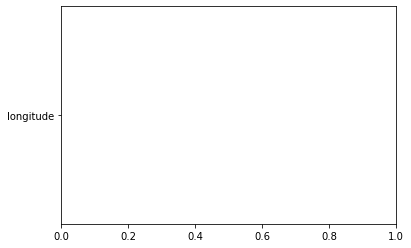

In [348]:
plt.barh(features, feature_importances.tolist())

In [350]:
final_model = grid_search.best_estimator_
final_predictions = final_model.predict(test_data)
final_mse = mean_squared_error(test_labels, final_predictions)
final_rmse = np.sqrt(final_mse)
final_rmse

66724.91323204986